In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [108]:
# Read business.csv file
df_business = pd.read_csv('business.csv')

# Get the following columns: address, attributes, categories, city, name, postal_code, review_count, stars, state
df_business = df_business[['address', 'attributes', 'categories', 'city', 'name', 'postal_code', 
                           'review_count', 'stars', 'state']]

# Get businesses in the 'state' of NV
df_business = df_business.loc[df_business['state'] == ('NV')]

# Create a column to check if the business is a 'Restaurant'
df_business['is a restaurant'] = df_business['categories'].str.contains("Restaurants")

# Filter dataframe for rows that are True for 'is a restaurant'
df_business = df_business.loc[df_business['is a restaurant'] == (True)]

# Get businesses in Las Vegas of NV
df_business = df_business.loc[df_business['city'].str.contains("Vegas")]

# Drop where attributes is NaN
df_business = df_business.dropna(subset=['attributes'])

# Reset index of df
df_business = df_business.reset_index(drop = True)
df_business

,address,attributes,categories,city,name,postal_code,review_count,stars,state,is a restaurant
0,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",Las Vegas,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True
1,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,True
2,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': ""{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,Dairy Queen,89146,33,2.0,NV,True
3,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ""'dressy'"", 'Corkage': '...","Restaurants, Pizza, Italian, American (New)",Las Vegas,Artisan Fine Dining Room,89102,3,2.0,NV,True
4,241 W Charleston Blvd,"{'BusinessParking': ""{'garage': False, 'street...","Food, Pizza, Wine Bars, Bars, Restaurants, Nig...",Las Vegas,Bistro Divino,89102,3,4.5,NV,True
5,3655 Las Vegas Blvd S,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","French, Restaurants, Creperies",Las Vegas,La Creperie,89109,535,3.5,NV,True
6,2411 W Sahara Ave,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Buffets, Restaurants",Las Vegas,Feast Buffet,89102,287,3.0,NV,True
7,"3500 Las Vegas Blvd S, Ste E11","{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Sandwiches, Restaurants, Delis, Desserts, Food",Las Vegas,Stage Deli Of Las Vegas,89109,28,3.5,NV,True
8,1263 Silverado Ranch Blvd,"{'RestaurantsDelivery': 'True', 'BusinessParki...","Middle Eastern, Restaurants, Vegetarian, Juice...",Las Vegas,Pita Pit,89183,77,4.0,NV,True
9,"3342 E Sandhill Rd, Ste 11","{'GoodForDancing': 'False', 'GoodForKids': 'Fa...","Dive Bars, Food, Bars, Pubs, Restaurants, Nigh...",Las Vegas,Mr G's Pub & Grub,89121,27,4.0,NV,True


In [109]:
# Convert the dictionary objects in 'attributes' to columns in a new df
df_business["attributes"] = df_business["attributes"].apply(lambda x : dict(eval(x)) )
df_attributes = df_business["attributes"].apply(pd.Series)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,...,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
0,False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,False,'casual',"{'romantic': False, 'intimate': False, 'touris...",False,'yes_free',u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,True,False,False,'casual',"{'romantic': False, 'intimate': False, 'touris...",False,'yes_free',u'average',False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,True,False,NaN,'casual',NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,True,True,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,True,False,False,'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,u'quiet',True,...,"{'monday': False, 'tuesday': False, 'friday': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Since 'Ambience' is a subjective measurement, we decided to remove it from the dataframe. 
# The definition for words like "romantic", "hipster", or "touristy" vary between Yelp users 
# and is difficult to account for.

#SCRAP NOISE LEVEL AND RESTAURANT ATTIRE BC THEY ARE ALSO SUBJECTIVE AND CANNOT BE EVALUATED AS TRUE AND FALSE
df_attributes = df_attributes.drop(["RestaurantsAttire","NoiseLevel"],axis = 1)
# Drop 'Ambience' column
df_attributes = df_attributes.drop(['Ambience'], axis = 1)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,BYOBCorkage,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,...,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
0,False,True,False,True,False,'no',True,2,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,True,NaN,True,1,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,False,False,False,NaN,True,1,True,'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,True,True,'yes_corkage',False,4,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,False,False,'yes_free',True,2,True,'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,True,False,False,False,'yes_free',False,1,True,'free',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,True,False,NaN,NaN,NaN,True,2,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,True,True,False,False,NaN,True,1,True,'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,True,False,False,True,NaN,True,1,True,'no',...,"{'monday': False, 'tuesday': False, 'friday': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
list(df_attributes)

['OutdoorSeating',
 'BusinessAcceptsCreditCards',
 'RestaurantsDelivery',
 'RestaurantsReservations',
 'HasTV',
 'BYOBCorkage',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange2',
 'RestaurantsGoodForGroups',
 'WiFi',
 'Caters',
 'GoodForKids',
 'Alcohol',
 'BusinessParking',
 'BikeParking',
 'HappyHour',
 'GoodForMeal',
 'Corkage',
 'BYOB',
 'RestaurantsTableService',
 'WheelchairAccessible',
 'ByAppointmentOnly',
 'BusinessAcceptsBitcoin',
 'GoodForDancing',
 'Music',
 'BestNights',
 'DogsAllowed',
 'DriveThru',
 'Smoking',
 'CoatCheck',
 'AgesAllowed',
 'DietaryRestrictions',
 'AcceptsInsurance',
 'Open24Hours',
 'RestaurantsCounterService']

In [112]:
# Ratio of missing NaN attributes
df_missing = pd.DataFrame([{'column':c, 'missing': (df_attributes[c].isnull().sum()/df_attributes.shape[0])} for c in df_attributes.columns])
df_missing = df_missing.sort_values('missing', ascending=False)
df_missing

# lists of columns that have a missing ratio greater than 0.25%
droppable_features = []
droppable_features.extend(df_missing[df_missing.missing > 0.25].column.tolist())
droppable_features

# Drop columns with more than 25% missing data
df_attributes.drop(droppable_features, axis=1, inplace=True)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,u'no',True,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
1,False,True,False,False,True,True,1,True,u'no',True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'..."
2,False,True,False,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
3,False,True,False,True,True,False,4,True,u'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
4,NaN,True,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'..."
5,False,True,False,False,False,True,2,True,'no',True,'none',"{'garage': True, 'street': False, 'validated':..."
6,False,True,False,False,False,False,1,True,'free',True,u'beer_and_wine',"{'garage': True, 'street': False, 'validated':..."
7,False,True,False,NaN,NaN,True,2,True,NaN,True,NaN,"{'garage': True, 'street': False, 'validated':..."
8,False,True,True,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
9,False,True,False,False,True,True,1,True,'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."


In [113]:
#reset index to allow easier looping through the dataframe then drop index and level0 columns that appear as a result
df_attributes = df_attributes.reset_index()
df_attributes.drop(columns=["index"], inplace = True)
#df_attributes.drop(columns=["level_0"], inplace = True)
    

In [114]:
df_attributes['BusinessParking'].replace('None',np.nan,inplace = True)
df_attributes['BusinessParking'].fillna("False",inplace = True)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,u'no',True,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
1,False,True,False,False,True,True,1,True,u'no',True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'..."
2,False,True,False,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
3,False,True,False,True,True,False,4,True,u'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
4,NaN,True,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'..."
5,False,True,False,False,False,True,2,True,'no',True,'none',"{'garage': True, 'street': False, 'validated':..."
6,False,True,False,False,False,False,1,True,'free',True,u'beer_and_wine',"{'garage': True, 'street': False, 'validated':..."
7,False,True,False,NaN,NaN,True,2,True,NaN,True,NaN,"{'garage': True, 'street': False, 'validated':..."
8,False,True,True,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
9,False,True,False,False,True,True,1,True,'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."


In [115]:
for index in np.arange(0,len(df_attributes['BusinessParking'])): 
    if "True" in df_attributes["BusinessParking"][index]:
        df_attributes["BusinessParking"][index] = True
    else:
        df_attributes["BusinessParking"][index] = False
    
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,u'no',True,u'full_bar',True
1,False,True,False,False,True,True,1,True,u'no',True,u'beer_and_wine',True
2,False,True,False,False,False,True,1,True,'no',True,u'none',True
3,False,True,False,True,True,False,4,True,u'no',False,u'full_bar',True
4,NaN,True,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,False
5,False,True,False,False,False,True,2,True,'no',True,'none',True
6,False,True,False,False,False,False,1,True,'free',True,u'beer_and_wine',True
7,False,True,False,NaN,NaN,True,2,True,NaN,True,NaN,True
8,False,True,True,False,False,True,1,True,'no',True,u'none',True
9,False,True,False,False,True,True,1,True,'no',False,u'full_bar',True


In [116]:
#change nan values in Alcohol column to "False"
df_attributes.fillna("False",inplace = True)

In [117]:
df_attributes['WiFi'].unique()
def standardize_wifi(wifi):
    
    if 'free' in wifi:
        output = True
        
    elif 'paid' in wifi:
        output = True    

    elif 'no' in wifi:
        output = False  
        
    elif 'None' in wifi:
        output = False  
        
    else: 
        output = False
    
    return output

In [118]:
df_attributes['WiFi'] = df_attributes['WiFi'].apply(standardize_wifi)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,False,True,u'full_bar',True
1,False,True,False,False,True,True,1,True,False,True,u'beer_and_wine',True
2,False,True,False,False,False,True,1,True,False,True,u'none',True
3,False,True,False,True,True,False,4,True,False,False,u'full_bar',True
4,False,True,False,False,False,False,2,False,False,False,False,False
5,False,True,False,False,False,True,2,True,False,True,'none',True
6,False,True,False,False,False,False,1,True,True,True,u'beer_and_wine',True
7,False,True,False,False,False,True,2,True,False,True,False,True
8,False,True,True,False,False,True,1,True,False,True,u'none',True
9,False,True,False,False,True,True,1,True,False,False,u'full_bar',True


In [119]:
#cleaning alcohol columns; assume if NaN, then there is no alcohol served in that restaurant
def standardize_Alcohol(string):
    if "bar" in string:
        output = True
    elif "beer" in string:
        output = True
    else:
        output = False
    return output

In [120]:
#apply the standardization to the Alcohol column
df_attributes["Alcohol"] = df_attributes["Alcohol"].apply(standardize_Alcohol)

In [121]:
# Add restaurant price to df_business
df_business['restaurant_price'] = df_attributes['RestaurantsPriceRange2']

# Drop restaurant price range from df_attributes
df_attributes = df_attributes.drop(columns=['RestaurantsPriceRange2'])
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,True,False,True,True,True
1,False,True,False,False,True,True,True,False,True,True,True
2,False,True,False,False,False,True,True,False,True,False,True
3,False,True,False,True,True,False,True,False,False,True,True
4,False,True,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,True,True,False,True,False,True
6,False,True,False,False,False,False,True,True,True,True,True
7,False,True,False,False,False,True,True,False,True,False,True
8,False,True,True,False,False,True,True,False,True,False,True
9,False,True,False,False,True,True,True,False,False,True,True


In [122]:
# Add total number of True values for each row

sum_true = df_attributes[df_attributes == True].sum(axis = 1)
sum_true
# Add sum_true to df_business


0       2.0
1       2.0
2       1.0
3       2.0
4       0.0
5       1.0
6       3.0
7       1.0
8       1.0
9       2.0
10      2.0
11      1.0
12      2.0
13      2.0
14      1.0
15      1.0
16      2.0
17      2.0
18      1.0
19      3.0
20      3.0
21      1.0
22      0.0
23      2.0
24      0.0
25      1.0
26      1.0
27      2.0
28      2.0
29      1.0
       ... 
6620    1.0
6621    2.0
6622    2.0
6623    0.0
6624    2.0
6625    1.0
6626    1.0
6627    0.0
6628    1.0
6629    0.0
6630    2.0
6631    2.0
6632    1.0
6633    1.0
6634    0.0
6635    3.0
6636    2.0
6637    2.0
6638    2.0
6639    1.0
6640    0.0
6641    1.0
6642    1.0
6643    2.0
6644    1.0
6645    3.0
6646    2.0
6647    0.0
6648    0.0
6649    1.0
Length: 6650, dtype: float64

In [123]:
# Create new df for restaurants between 1 and 2 dollar signs
df_price_1to2 = df_business.loc[(df_business['restaurant_price'] == ('1')) 
                                | (df_business['restaurant_price'] == ('2'))]

# Create new df for restaurants between 3 and 4 dollar signs
df_price_3to4 = df_business.loc[(df_business['restaurant_price'] == ('3')) 
                                | (df_business['restaurant_price'] == ('4'))]

# Create new df for restaurants with 5 dollar signs
df_price_5 = df_business.loc[df_business['restaurant_price'] == ('5')]


In [124]:
print("The number of restaurants with $-$$ is " + str(df_price_1to2.shape[0]))
print("The number of restaurants with $$$-$$$$ is " + str(df_price_3to4.shape[0]))
print("The number of restaurants with $$$$$ is " + str(df_price_5.shape[0]))

The number of restaurants with $-$$ is 5881
The number of restaurants with $$$-$$$$ is 420
The number of restaurants with $$$$$ is 0


In [125]:
list(df_price_1to2)

['address',
 'attributes',
 'categories',
 'city',
 'name',
 'postal_code',
 'review_count',
 'stars',
 'state',
 'is a restaurant',
 'restaurant_price']

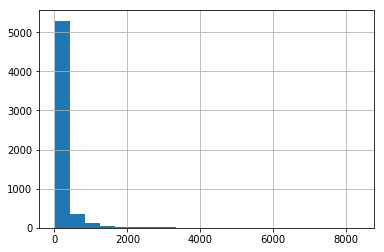

In [126]:
# Plot a histogram for sum_true within $-$$
df_price_1to2.review_count.hist(bins=20)
f1 = plt.gcf()

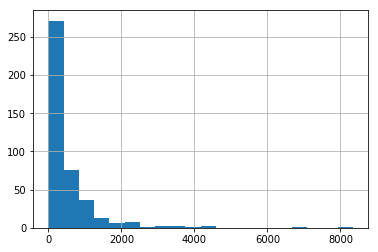

In [127]:
# Plot a histogram for sum_true within $$$-$$$$
df_price_3to4.review_count.hist(bins=20)
f2 = plt.gcf()

In [ ]:
# Make a scatter plot with sum_true on the y-axis and stars on the x-axis for $-$$
df_price_1to2.plot.scatter(x = 'stars', y = 'sum_true');

# xs = np.arange(18, 81)
ys = pred_stars
plt.plot(xs, ys, color = 'r')

plt.ylabel('sum_true')
plt.xlabel('stars')

f3 = plt.gcf()

In [ ]:
# Make a scatter plot with sum_true on the y-axis and stars on the x-axis for $-$$
df_price_3to4.plot.scatter(x = 'stars', y = 'sum_true');

# xs = np.arange(18, 81)
ys = pred_stars
plt.plot(xs, ys, color = 'r')

plt.ylabel('sum_true')
plt.xlabel('stars')

f4 = plt.gcf()